In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.insert(0,"../")

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

import core.utils_disco
from core.dataloader import CLEVR_train, collate_boxes

In [ ]:
train_dataset = CLEVR_train(root_dir='/home/mprabhud/dataset/clevr_lang/npys/ab_5t.txt')
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True, collate_fn=collate_boxes)

Initialised..... 234  files...


In [ ]:
train_iter = iter(train_loader)

feed_dict_q_, feed_dict_k_, metadata_ = next(train_iter)
    
# feed_dict_q_["images"] = feed_dict_q_["images"].cuda()
# feed_dict_k_["images"] = feed_dict_k_["images"].cuda()

../core/utils_disco.py:98: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xmin,ymin,zmin,xmax,ymax,zmax = torch.unbind(torch.tensor(aligned_boxes), dim=-1)


In [ ]:
feed_dict_ = feed_dict_k_

In [ ]:
import matplotlib.pyplot as plt
import cv2

def draw_bounding_box(image, bboxes):
    
    num_obj= bboxes.size(0)
    fig = plt.figure(figsize=(8,8*num_obj))
    
    axes = []
    for o in range(num_obj):
        ax = (fig.add_subplot(1,num_obj,o+1))
        axes.append(ax)
        box = bboxes[o]
        x1,y1,x2,y2 = box
        x1 = int(x1.item()); x2 = int(x2.item()); y1 = int(y1.item()); y2 = int(y2.item())
        ax.title.set_text("x1:{} , x2:{} , y1:{} , y2:{}".format(x1,x2,y1,y2))
        img = cv2.rectangle(image.copy(),(x1,y1),(x2,y2),(0,255,0),2)
        plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


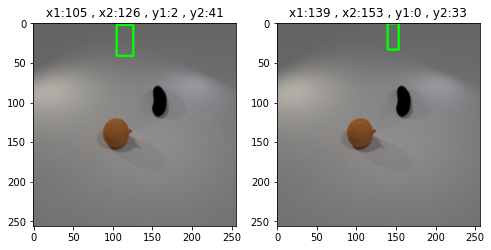

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


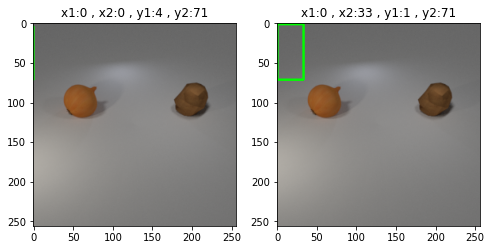

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


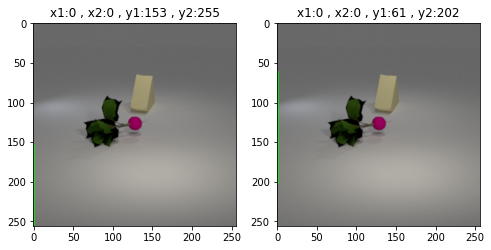

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


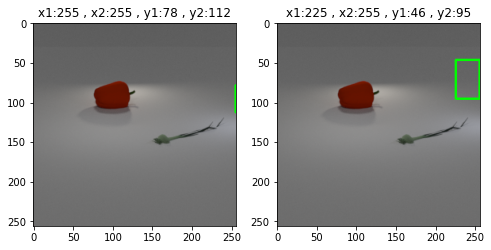

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


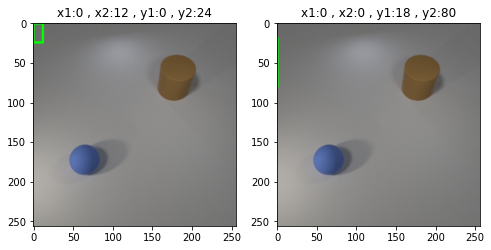

In [ ]:
images = feed_dict_["images"]
objects = feed_dict_["objects_boxes"]
objects_length = feed_dict_["objects"]
num_batch = images.size(0)

objects_index = 0
for i in range(num_batch):
    box = objects[objects_index:objects_index + objects_length[i].item()].cpu()
    objects_index += objects_length[i].item() 
    
    draw_bounding_box(images[i].permute(1,2,0).cpu().numpy(), box)
    plt.show()